<a href="https://colab.research.google.com/github/hevertonvalerio/vinicula_classificacao/blob/main/Projeto_Classifica%C3%A7%C3%A3o_CNN_Vinicula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando os Daos

In [1]:
 url = '/content/drive/MyDrive/Colab Notebooks/Estudo/Tensor Flow/Projeto Vinícula/uvas'

In [2]:
import pathlib
import PIL

In [3]:
data_dir = pathlib.Path(url)

In [4]:
len(list(data_dir.glob('*/*.JPG')))

1600

In [5]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [6]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()] # Use iterdir() to iterate over the directory contents
subfolders

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [7]:
leafblight = list(data_dir.glob('LeafBlight/*'))

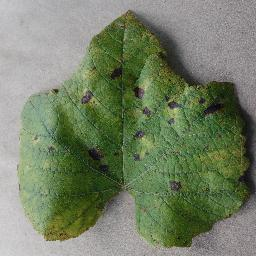

In [8]:
PIL.Image.open(str(leafblight[3]))

# Explorando e Visualizando dados

In [9]:
import numpy as np

In [10]:
for subfolder in subfolders:
  path = data_dir / subfolder
  images = list(path.glob('*.JPG'))
  print(f'Classe {subfolder} tem {len(images)} imagens')

  if images:
    img = PIL.Image.open(str(images[0]))
    img_array = np.array(img)
    print(f'e as dimensões de sua 1ª imagem são: {img_array.shape}')

Classe BlackMeasles tem 400 imagens
e as dimensões de sua 1ª imagem são: (256, 256, 3)
Classe BlackRot tem 400 imagens
e as dimensões de sua 1ª imagem são: (256, 256, 3)
Classe HealthyGrapes tem 400 imagens
e as dimensões de sua 1ª imagem são: (256, 256, 3)
Classe LeafBlight tem 400 imagens
e as dimensões de sua 1ª imagem são: (256, 256, 3)


# Carregando dados com TensorFLow


In [11]:
import tensorflow as tf

In [12]:
batch_size = 64
altura = 256
largura = 256

In [13]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed = 568,
    image_size=(altura, largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.


In [14]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed = 568,
    image_size=(altura, largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


Batch_size = (tamanho do lote) é a porção de passagens que o conjunto de dados irá sofrer para ser carregado. Quanto menor o Batch_size, mais direto é o carregamento, quanto maior o Batch_size, mais divido será o carregamento.

Batch_size pequenos = 32, 64 \
Batch_size grandes = 128, 256

Montando o modelo

In [15]:
tf.random.set_seed(424242)

In [16]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [17]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [18]:
modelo.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [19]:
k()

NameError: name 'k' is not defined

Treinando o Modelo

In [ ]:
# Teste de funcionamento GPU

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
# modelo.fit(treino, validation_data=validacao, epochs=10)

In [ ]:
epocas = 10

history = modelo.fit(
  treino,
  validation_data=validacao,
  epochs=epocas
)

In [ ]:
modelo.summary()

Verificando Resultados

In [20]:
import matplotlib.pyplot as plt

In [21]:
def plota_resultados(history,epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epochs)

  plt.figure(figsize=(12,6))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, 'r', label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, 'b', label='Acurácia da Validação')
  plt.legend(loc='lower right')

  plt.subplot(1, 2, 2)

  plt.plot(intervalo_epocas, loss, 'r', label='Perda do Treino')
  plt.plot(intervalo_epocas, val_loss, 'b', label='Perda da Validação')
  plt.legend(loc='upper right')
  plt.show()


In [ ]:
plota_resultados(history,epocas)

#CNNs


In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [ ]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
epocas = 10

history = modelo.fit(
  treino,
  validation_data=validacao,
  epochs=epocas
)

In [ ]:
plota_resultados(history,epocas)

Early Stop

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>=0.93):
      print('\n Alcançamos 93% de acurácia. Parando o Treinamento')
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [ ]:
epocas = 10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
    callbacks=[callbacks]
)

In [ ]:
plota_resultados(history,epocas)

Aumentando a diversidade do dataset

Visaando a melhora do modelo, especialmente em sua generalização

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.5),
    tf.keras.layers.RandomZoom(0.05)
])

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [ ]:
epocas = 50

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
    callbacks=[callbacks]
)

In [ ]:
plota_resultados(history,epocas)

# TransferLearning - Usando modelos pré-treinados

In [22]:
input_shape = (256, 256, 3)

In [23]:
modelo_base = tf.keras.applications.InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [24]:
modelo_base.trainable=False

In [25]:
modelo_base.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 127, 127, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 127, 127, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 127, 127, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 125, 125, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 125, 125, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 125, 125, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 125, 125, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 125, 125, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 125, 125, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 62, 62, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 62, 62, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 62, 62, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 62, 62, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 60, 60, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 60, 60, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [26]:
rescale = tf.keras.layers.Rescaling((1./255))
treino = treino.map(lambda x, y: (rescale(x), y))
validacao = validacao.map(lambda x, y: (rescale(x), y))

In [27]:
ultima_camada = modelo_base.get_layer('mixed7')
# print('ultima_camada',ultima_camada.output_shape)
ultima_saida = ultima_camada.output
print(ultima_saida)

<KerasTensor shape=(None, 14, 14, 768), dtype=float32, sparse=False, name=keras_tensor_233>


In [28]:
x = tf.keras.layers.Flatten()(ultima_saida)

x = tf.keras.layers.Dense(1024, activation='relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(4, activation='softmax')(x)

modelo = tf.keras.Model(inputs=modelo_base.input,outputs=x)

In [29]:
modelo.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 127, 127, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 127, 127, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 127, 127, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 125, 125, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 125, 125, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 125, 125, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 125, 125, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 125, 125, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 125, 125, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 62, 62, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 62, 62, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 62, 62, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 62, 62, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 60, 60, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 60, 60, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 163,121,060 (622.26 MB)

 Trainable params: 154,145,796 (588.02 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [30]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

In [31]:
epocas = 20

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 375s 18s/step - accuracy: 0.5340 - loss: 13.5520 - val_accuracy: 0.9094 - val_loss: 0.4014
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 374s 19s/step - accuracy: 0.9435 - loss: 0.2775 - val_accuracy: 0.9937 - val_loss: 0.0322
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 368s 18s/step - accuracy: 0.9858 - loss: 0.0419 - val_accuracy: 0.9937 - val_loss: 0.0351
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 385s 19s/step - accuracy: 0.9946 - loss: 0.0114 - val_accuracy: 0.9937 - val_loss: 0.0442
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 381s 19s/step - accuracy: 0.9975 - loss: 0.0052 - val_accuracy: 0.9937 - val_loss: 0.0238
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 414s 21s/step - accuracy: 0.9973 - loss: 0.0127 - val_accuracy: 0.9937 - val_loss: 0.0163
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 370s 19s/step - accuracy: 0.9990 - loss: 0.0021 - val_accuracy: 0.9937 - val_loss: 0.0145
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 357s 18s/step - accuracy: 0.9995 - loss: 0.0018 - val_accuracy: 0

KeyboardInterrupt: 

In [32]:
modelo.save('modelo_TransferLearning_InceptionV3_final')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=modelo_TransferLearning_InceptionV3_final.

In [33]:
modelo.save('modelo_final_transfer_learning.h5', include_optimizer=False)

In [34]:
modelo.save_weights('pesos.h5')

ValueError: The filename must end in `.weights.h5`. Received: filepath=pesos.h5

In [35]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)

In [38]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]


In [39]:
modelo_quantizado = converter.convert()

Saved artifact at '/tmp/tmpzpweefi_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_5')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132276262346896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132273457689376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132273457691488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132273457683744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132273459510816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132275940051600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132275940052128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132275940052304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132275940055648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132273456644336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132273456646

In [41]:
with open('modelo_quantizado16bits.tflite', 'wb') as f:
  f.write(modelo_quantizado)

# Desenvolvendo Aplicação

In [ ]:
streamlit